# Comparisson of raw and ingested data

In this notebook, I'll load in the ingested .cdf file for the 11/2/2021 and the mpl .nc files from the raw data for the same day. I'll then plot their backscatters to see if they both look reasonbale, and also (somehow) compare the two datasets.

In [1]:
# initial imports

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
# determining where files are and what files exist...

dir_target = '/home/users/eeasm/_scripts/ICESat2/src/mpl'

# directory containinng the converted raw .mpl files
dir_raw = os.path.join(dir_target, 'mpl')

## Opening the ingested file

In this section I will focus on opening the ingested file `smtmplpolX1.a1.20210211.000000.cdf` into an xarray format.

In [3]:
fname = 'smtmplpolX1.a1.20210211.000000.cdf'

ds_ingested = xr.open_dataset(os.path.join(dir_target, fname))
ds_ingested

<xarray.Dataset>
Dimensions:          (time: 17280, height: 1200)
Coordinates:
  * height           (height) float32 -2.998 -2.983 -2.968 ... 14.94 14.96 14.97
Dimensions without coordinates: time
Data variables: (12/19)
    base_time        datetime64[ns] ...
    time_offset      (time) timedelta64[ns] ...
    hour             (time) float32 ...
    nshots           (time) int32 ...
    rep_rate         (time) int32 ...
    energy           (time) float32 ...
    ...               ...
    initial_cbh      (time) float32 ...
    backscatter_1    (time, height) float32 ...
    backscatter_2    (time, height) float32 ...
    lat              float32 ...
    lon              float32 ...
    alt              float32 ...
Attributes:
    Date_created:              Mon Mar 01 16:43:44 2021 UTC
    Ingest_version:            $Id: dave_mpl.polarization.c,v 1.8 2015/09/24 ...
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

In [4]:
depol_MPL = ds_ingested['backscatter_1'] / ds_ingested['backscatter_2']
depol_linear = depol_MPL / (1-depol_MPL)

ds_ingested['depol_MPL'] = depol_MPL
ds_ingested['depol_linear'] = depol_linear

plotting backscatter_1
plotting backscatter_2
plotting depol_MPL
plotting depol_linear


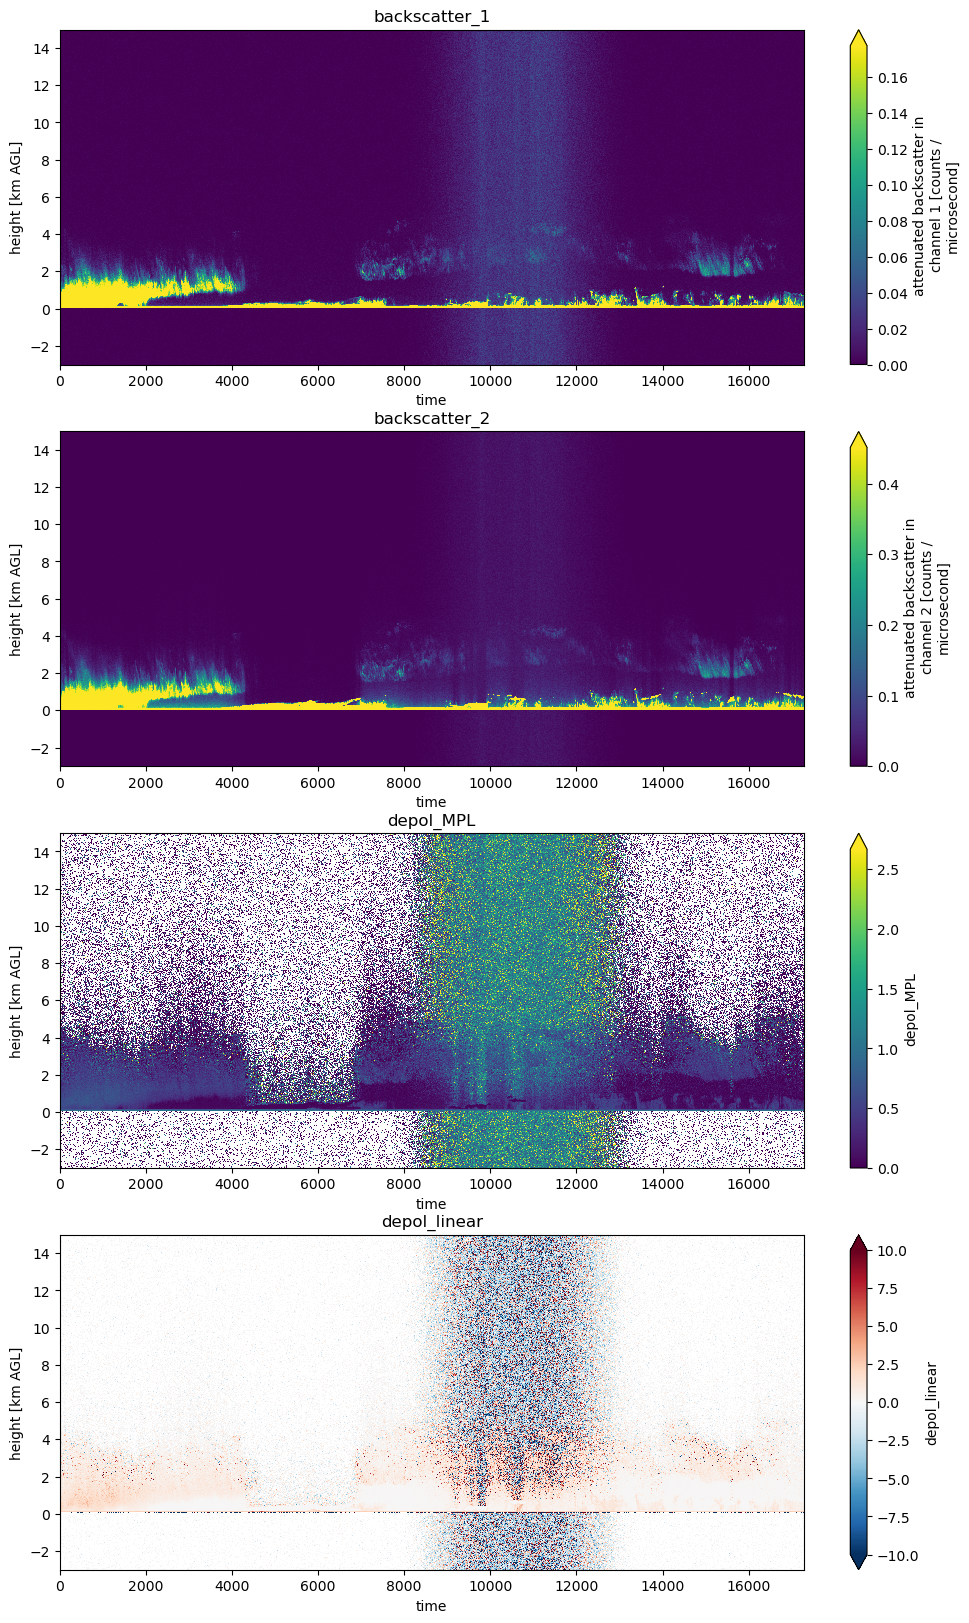

In [5]:
fig, axs = plt.subplots(4,1,figsize=(12,20))

plottables = ['backscatter_1', 'backscatter_2', 'depol_MPL', 'depol_linear']

for i,p in enumerate(plottables):
    print(f'plotting {p}')
    ds_ingested[p].plot(x='time',ax=axs[i],robust=True)
    axs[i].set_title(p)

plt.show()

# Opening the converted raw files

In this section I'll focus on loading in the files generated from the raw .mpl data, and plotting their similar characteristics.

In [7]:
# testing opening one of the files
fname0 = '202102110000..nc'
ds_raw1 = xr.open_dataset(os.path.join(dir_raw, fname0))
ds_raw1

<xarray.Dataset>
Dimensions:                      (profile: 720, range: 1999)
Dimensions without coordinates: profile, range
Data variables: (12/52)
    unit                         (profile) float32 ...
    version                      (profile) float32 ...
    shots_sum                    (profile) float64 ...
    trigger_frequency            (profile) float64 ...
    energy_monitor               (profile) float64 ...
    temp_0                       (profile) float64 ...
    ...                           ...
    channel_2                    (profile, range) float32 ...
    time_utc                     (profile) object ...
    time                         (profile) datetime64[ns] ...
    c                            float64 ...
    nrb_copol                    (profile, range) float64 ...
    nrb_crosspol                 (profile, range) float64 ...
Attributes:
    created:   2023-01-26T:14:28:15Z
    software:  mpl2nc (https://github.com/peterkuma/mpl2nc)
    version:   1.3.5

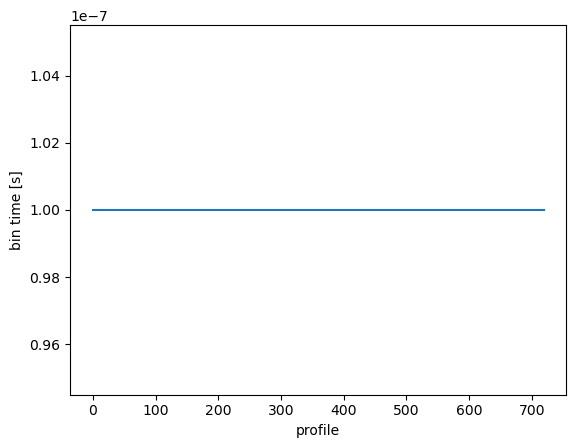

In [10]:
ds_raw1.bin_time.plot()

In [8]:
depol_MPL = ds_raw1['channel_1'] / ds_raw1['channel_2']
depol_linear = depol_MPL / (1-depol_MPL)

ds_raw1['depol_MPL'] = depol_MPL
ds_raw1['depol_linear'] = depol_linear

plotting channel_1
plotting channel_2
plotting depol_MPL
plotting depol_linear


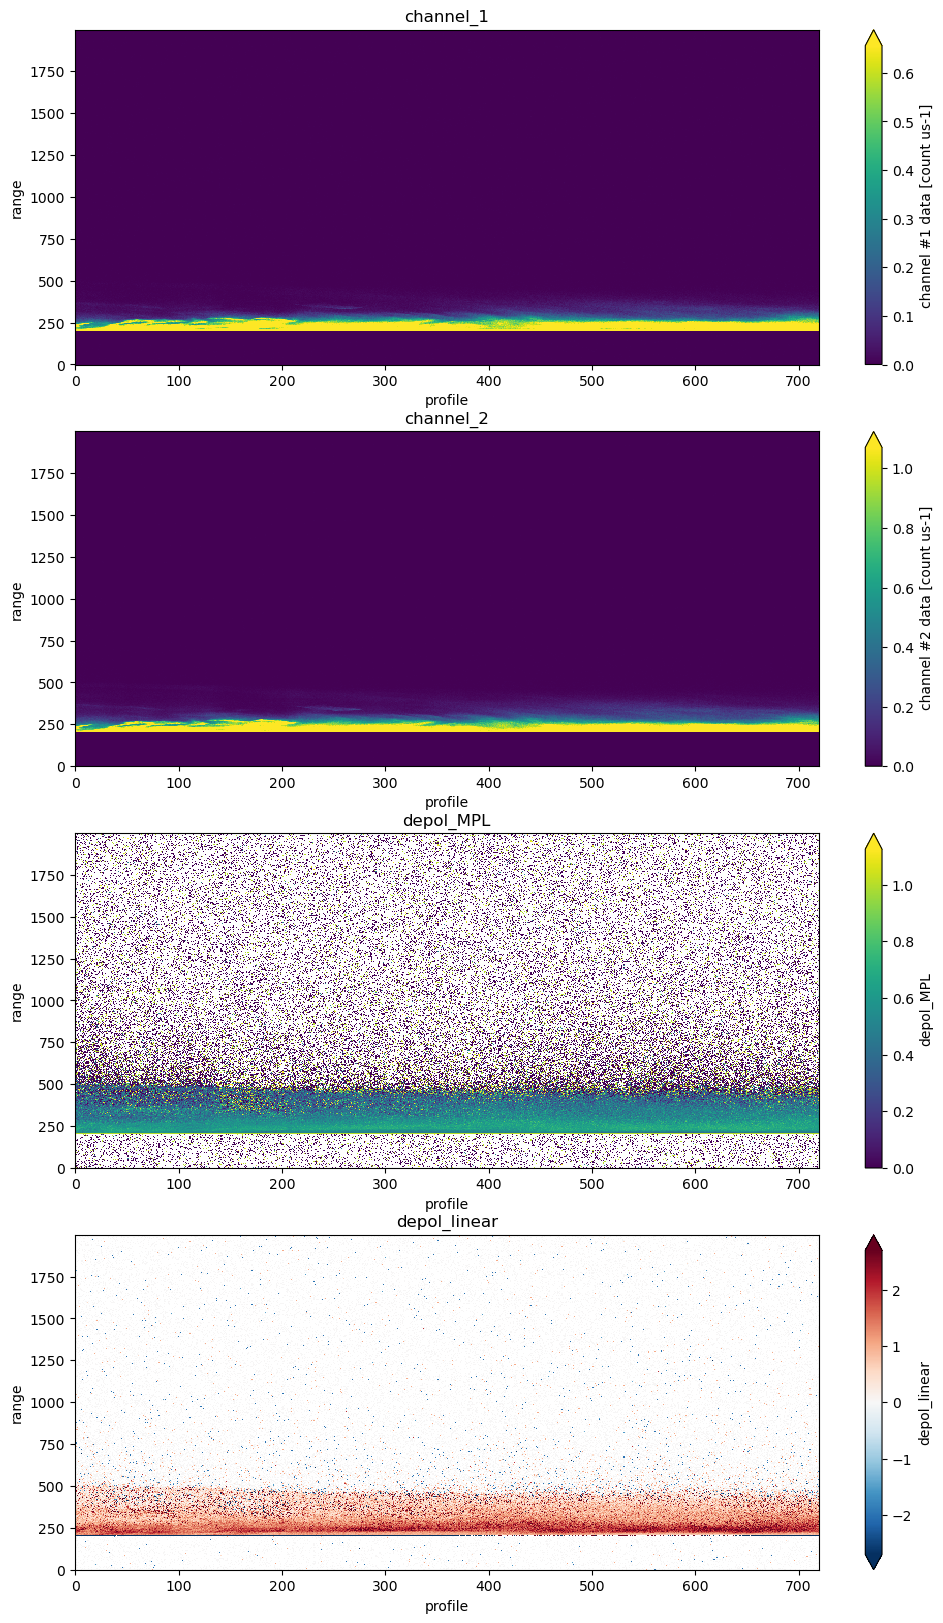

In [9]:
fig, axs = plt.subplots(4,1,figsize=(12,20))

plottables = ['channel_1', 'channel_2', 'depol_MPL', 'depol_linear']

for i,p in enumerate(plottables):
    print(f'plotting {p}')
    ds_raw1[p].plot(x='profile',ax=axs[i],robust=True)
    axs[i].set_title(p)

plt.show()

In [13]:
ds_raw = xr.open_mfdataset(dir_raw + '/*.nc', combine='nested',concat_dim='profile')
ds_raw

: 

: 